In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import nltk.classify.util 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn import metrics 
from sklearn.metrics import roc_curve, auc 
from nltk.classify import NaiveBayesClassifier 
import numpy as np 
import re 
import string 
import nltk 
%matplotlib inline

In [4]:
file_path = "1429_1.csv"
data = pd.read_csv(file_path, low_memory=False)

data.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [5]:
selected_columns = ["reviews.rating", "reviews.text", "reviews.username", "reviews.title"]
filtered_data = data[selected_columns]

output_file_path = "extracted_data.csv"
filtered_data.to_csv(output_file_path, index=False)

new_data = pd.read_csv('extracted_data.csv', low_memory=False)
new_data.head()

,reviews.rating,reviews.text,reviews.username,reviews.title
0,5.0,This product so far has not disappointed. My c...,Adapter,Kindle
1,5.0,great for beginner or experienced person. Boug...,truman,very fast
2,5.0,Inexpensive tablet for him to use and learn on...,DaveZ,Beginner tablet for our 9 year old son.
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Shacks,Good!!!
4,5.0,I bought this for my grand daughter when she c...,explore42,Fantastic Tablet for kids


In [7]:
missing_values = new_data.isna()

print(missing_values.sum())

reviews.rating      33
reviews.text         1
reviews.username     2
reviews.title        5
dtype: int64


In [8]:
senti = new_data.dropna(subset=["reviews.rating"])

check = new_data[data["reviews.rating"].isna()]

senti.reset_index(drop=True, inplace=True)
check.reset_index(drop=True, inplace=True)
senti.head()

,reviews.rating,reviews.text,reviews.username,reviews.title
0,5.0,This product so far has not disappointed. My c...,Adapter,Kindle
1,5.0,great for beginner or experienced person. Boug...,truman,very fast
2,5.0,Inexpensive tablet for him to use and learn on...,DaveZ,Beginner tablet for our 9 year old son.
3,4.0,I've had my Fire HD 8 two weeks now and I love...,Shacks,Good!!!
4,5.0,I bought this for my grand daughter when she c...,explore42,Fantastic Tablet for kids


In [9]:
senti['reviews.rating'] = senti['reviews.rating'].apply(lambda x: 'pos' if x >= 4 else 'neg')

senti = senti.rename(columns={'reviews.rating': 'senti'})
senti.head()

<ipython-input-9-6db29383c842>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  senti['reviews.rating'] = senti['reviews.rating'].apply(lambda x: 'pos' if x >= 4 else 'neg')


,senti,reviews.text,reviews.username,reviews.title
0,pos,This product so far has not disappointed. My c...,Adapter,Kindle
1,pos,great for beginner or experienced person. Boug...,truman,very fast
2,pos,Inexpensive tablet for him to use and learn on...,DaveZ,Beginner tablet for our 9 year old son.
3,pos,I've had my Fire HD 8 two weeks now and I love...,Shacks,Good!!!
4,pos,I bought this for my grand daughter when she c...,explore42,Fantastic Tablet for kids


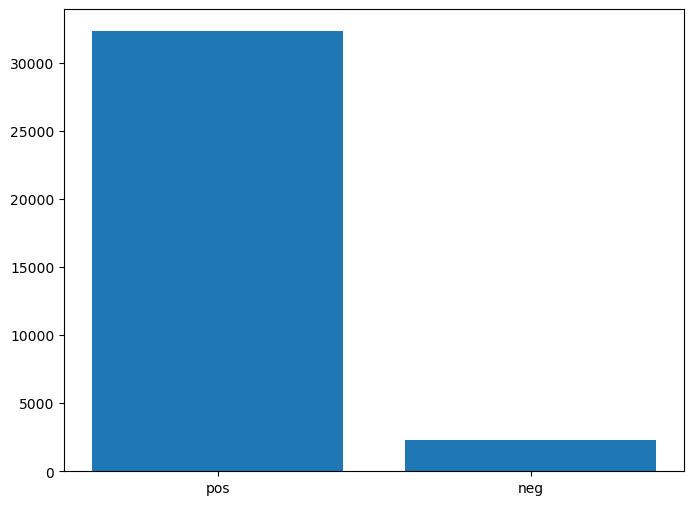

In [11]:
plt.figure(figsize=(8, 6))
plt.bar(['pos', 'neg'], [senti['senti'].value_counts()['pos'], senti['senti'].value_counts()['neg']])
plt.show()

In [12]:
import nltk.classify.util 
from nltk.classify import NaiveBayesClassifier 
import numpy as np 
import re 
import string 
import nltk

In [13]:
def cleanup(text):
    if not isinstance(text, str):
        text = str(text)

    cleaned_text = re.sub(r'[^a-zA-Z]', ' ', text)

    cleaned_text = cleaned_text.lower().strip()

    return cleaned_text

senti['summary_clean'] = senti['reviews.text'].apply(cleanup)
senti.head()

,senti,reviews.text,reviews.username,reviews.title,summary_clean
0,pos,This product so far has not disappointed. My c...,Adapter,Kindle,this product so far has not disappointed my c...
1,pos,great for beginner or experienced person. Boug...,truman,very fast,great for beginner or experienced person boug...
2,pos,Inexpensive tablet for him to use and learn on...,DaveZ,Beginner tablet for our 9 year old son.,inexpensive tablet for him to use and learn on...
3,pos,I've had my Fire HD 8 two weeks now and I love...,Shacks,Good!!!,i ve had my fire hd two weeks now and i love...
4,pos,I bought this for my grand daughter when she c...,explore42,Fantastic Tablet for kids,i bought this for my grand daughter when she c...


In [14]:
split = senti[['summary_clean', 'senti']]
split.head()

,summary_clean,senti
0,this product so far has not disappointed my c...,pos
1,great for beginner or experienced person boug...,pos
2,inexpensive tablet for him to use and learn on...,pos
3,i ve had my fire hd two weeks now and i love...,pos
4,i bought this for my grand daughter when she c...,pos


In [15]:
train_size = int(0.8 * len(split))

train = split.sample(n=train_size, random_state=42)

test = split.drop(train.index)

In [16]:
train.count()

summary_clean    27701
senti            27701
dtype: int64

In [17]:
test.count()

summary_clean    6926
senti            6926
dtype: int64

In [19]:
senti.head()

,senti,reviews.text,reviews.username,reviews.title,summary_clean
0,pos,This product so far has not disappointed. My c...,Adapter,Kindle,this product so far has not disappointed my c...
1,pos,great for beginner or experienced person. Boug...,truman,very fast,great for beginner or experienced person boug...
2,pos,Inexpensive tablet for him to use and learn on...,DaveZ,Beginner tablet for our 9 year old son.,inexpensive tablet for him to use and learn on...
3,pos,I've had my Fire HD 8 two weeks now and I love...,Shacks,Good!!!,i ve had my fire hd two weeks now and i love...
4,pos,I bought this for my grand daughter when she c...,explore42,Fantastic Tablet for kids,i bought this for my grand daughter when she c...


In [21]:
from wordcloud import STOPWORDS 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
train_sentences = train['summary_clean'].tolist()
train_labels = train['senti'].tolist()

test_sentences = test['summary_clean'].tolist()
test_labels = test['senti'].tolist()

train_sentence_indexes = list(enumerate(train_sentences))
train_label_indexes = list(enumerate(train_labels))

print("Training set sentences:")
print(train_sentences[:5])

if train_labels:
    print("Training set labels:")
    print(train_labels[:5])

print("Test set sentences:")
print(test_sentences[:5])

if test_labels:
    print("Test set labels:")
    print(test_labels[:5])

Training set sentences:
['i bought this for myself because i play my kindle long periods of time and now i can play while it is charging wouldn t be without it i can sit on my favorite chair and cord still reaches as it did not before', 'my daughter is away at school  and she uses this inexpensive amazon tablet  which she won t is should something happen to it  and it ll be easy to replace  it has all the functions she needs  though it doesn t support some apps  but it does support all the popular social media and has a decent camera  it s easy to use  big enough to read on  but it s not huge  and it s easy to hold  store and carry  my daughter enjoys the orange cover', 'bought this tablet for kids  great price for what you get  not as nice as the    hd but price is right  quick and responsive  would recommend for anyone looking for a tablet for child use  parent controls are a nice touch', 'great little device to save money  streams live and on demand tv  great way to save money on tv

In [25]:
from sklearn.linear_model import LogisticRegression

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(train['summary_clean'])
y_train = train['senti']
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

X_test = vectorizer.transform(test['summary_clean'])

y_test_pred = classifier.predict(X_test)

print(y_test_pred)

/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


['pos' 'pos' 'pos' ... 'pos' 'pos' 'pos']


In [26]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(train['summary_clean'])
X_test_counts = vectorizer.transform(test['summary_clean'])

tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

print("X_train_tfidf (TF-IDF vectors training set):")
print(X_train_tfidf[:5])

print("X_test_tfidf (TF-IDF vectors test set):")
print(X_test_tfidf[:5])

X_train_tfidf (TF-IDF vectors training set):
  (0, 12025)	0.21076993483079956
  (0, 11942)	0.1584114106218997
  (0, 11852)	0.16056821895185014
  (0, 10889)	0.1299853715553629
  (0, 10814)	0.06445073917883766
  (0, 10191)	0.15201118289962673
  (0, 9674)	0.2567529447525511
  (0, 8499)	0.33289238635583857
  (0, 7864)	0.26094218371379896
  (0, 7724)	0.2784606578594509
  (0, 7303)	0.0903835399346615
  (0, 7252)	0.08318440615910497
  (0, 7181)	0.14208120220602574
  (0, 7143)	0.10342065560507768
  (0, 6930)	0.18224487098098424
  (0, 6925)	0.13310643666582506
  (0, 6282)	0.16326234451398713
  (0, 5884)	0.10662687563791465
  (0, 5675)	0.16249241876079626
  (0, 5658)	0.06521736828716608
  (0, 4170)	0.05731167373522711
  (0, 3901)	0.1832425933177692
  (0, 2865)	0.1652251672363134
  (0, 2355)	0.2054912800007871
  (0, 1775)	0.20377607860742908
  :	:
  (4, 7390)	0.17365334172300576
  (4, 7389)	0.15861978175520375
  (4, 7311)	0.08431010228418014
  (4, 7303)	0.1429470103512626
  (4, 7253)	0.1315164920

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

y_train = train['senti']
classifier = MultinomialNB()
classifier.fit(X_train_tfidf, y_train)

X_test_counts = vectorizer.transform(test['summary_clean'])
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_test = test['senti']
y_test_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_test_pred)
classification_report_str = classification_report(y_test, y_test_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)


/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.93
Classification Report:
               precision    recall  f1-score   support

         neg       0.00      0.00      0.00       477
         pos       0.93      1.00      0.96      6449

    accuracy                           0.93      6926
   macro avg       0.47      0.50      0.48      6926
weighted avg       0.87      0.93      0.90      6926



In [30]:
from sklearn.naive_bayes import BernoulliNB

threshold = 0.2

y_train = train['senti']
classifier = BernoulliNB()
classifier.fit(X_train_tfidf, y_train)

X_test_counts = vectorizer.transform(test['summary_clean'])
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

y_test = test['senti']
y_test_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_test_pred)
classification_report_str = classification_report(y_test, y_test_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)


Accuracy: 0.89
Classification Report:
               precision    recall  f1-score   support

         neg       0.27      0.31      0.29       477
         pos       0.95      0.94      0.94      6449

    accuracy                           0.89      6926
   macro avg       0.61      0.62      0.61      6926
weighted avg       0.90      0.89      0.90      6926



In [31]:
y_train = train['senti']
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)

X_test_counts = vectorizer.transform(test['summary_clean'])
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_test = test['senti']
y_test_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_test_pred)
classification_report_str = classification_report(y_test, y_test_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

         neg       0.75      0.16      0.27       477
         pos       0.94      1.00      0.97      6449

    accuracy                           0.94      6926
   macro avg       0.85      0.58      0.62      6926
weighted avg       0.93      0.94      0.92      6926



In [32]:
y_train = train['senti']
classifier = LogisticRegression()
classifier.fit(X_train_tfidf, y_train)

X_test_counts = vectorizer.transform(test['summary_clean'])
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
y_test = test['senti']

y_test_pred = classifier.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_test_pred)
classification_report_str = classification_report(y_test, y_test_pred)

print("Performance on Test Set:")
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)

if 'verification' in globals() or 'verification' in locals():
    X_verification_counts = vectorizer.transform(verification['Summary_Clean'])
    X_verification_tfidf = tfidf_transformer.transform(X_verification_counts)
    y_verification = verification['senti']
    y_verification_pred = classifier.predict(X_verification_tfidf)

    accuracy_verification = accuracy_score(y_verification, y_verification_pred)
    classification_report_verification = classification_report(y_verification, y_verification_pred)

    print("\nPerformance on Verification Set:")
    print(f"Accuracy: {accuracy_verification:.2f}")
    print("Classification Report:\n", classification_report_verification)


Performance on Test Set:
Accuracy: 0.94
Classification Report:
               precision    recall  f1-score   support

         neg       0.75      0.16      0.27       477
         pos       0.94      1.00      0.97      6449

    accuracy                           0.94      6926
   macro avg       0.85      0.58      0.62      6926
weighted avg       0.93      0.94      0.92      6926



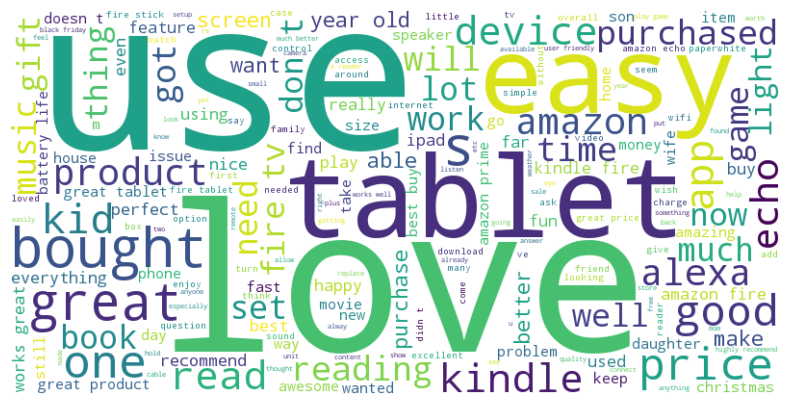

In [35]:
from wordcloud import WordCloud

text_data = senti['summary_clean'].str.cat(sep=' ')

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()